# Clase 6 de enero de 2026 #
## Estadística ##

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

ModuleNotFoundError: No module named 'seaborn'

## Momentos ##
Se utilizan para estimar parámetros desconocidos de una población.  

El estimador de la media se define como:
$$
\hat{\mu}=\frac{1}{n}\sum_{i=1}^{n} x_i
$$

Cuando los datos son generados por una variable aleatoria independiente e idénticamente distribuida ($E[X_i]=\mu$ y $V[X_i]=\sigma ^2$ para toda $i$) este estimador tiene algunas propiedades interesantes. De manera general, un estimador es una función matemática que calculate un estimado basado en $n$ observaciones.  

$$
E[\hat{\mu}]=\mu
$$
$$
V[\hat{\mu}]=?
$$  

Podemos definir el bias de un estimador como:  
$$
Bias(\hat{\theta})=E[\hat{\theta}]-\theta
$$  

¿Qué pasa ahora con el estimador de la varianza?  
Sabemos que  
$$
\sigma ^2=E[(X - E[X])^2]
$$  
$$
E[\hat{\sigma}^2]=?
$$

In [5]:
# Definimos la media verdadera de la distribución normal poblacional
media_real = 10

# Definimos la varianza verdadera de la distribución normal poblacional
var_real = 4

# Lista donde se almacenarán las medias muestrales estimadas en cada simulación
medias_est = []

# Lista para guardar el estimador de la varianza usando divisor n (estimador sesgado)
vars1_est = []

# Lista para guardar el estimador de la varianza usando divisor n-1 (estimador insesgado)
vars2_est = []

# Repetimos el experimento de muestreo 5000 veces (simulación Monte Carlo)
for _ in range(5000):

    # Generamos una muestra aleatoria de tamaño 20
    # proveniente de una distribución normal con media y varianza conocidas
    sim = np.random.normal(
        media_real,              # media poblacional
        np.sqrt(var_real),        # desviación estándar poblacional
        size=20                   # tamaño de la muestra
    )

    # Calculamos la media muestral de la simulación actual
    media_est = sim.mean()

    # Guardamos la media muestral en la lista correspondiente
    medias_est.append(media_est)

    # Calculamos la suma de los cuadrados de las desviaciones
    # respecto a la media muestral
    # ∑(Xi − X̄)²
    var = np.sum((sim - media_est)**2)

    # Estimador de la varianza dividiendo entre n
    # Este estimador es sesgado (subestima la varianza real)
    var1 = var / len(sim)

    # Estimador de la varianza dividiendo entre n − 1
    # Este estimador es insesgado (corrige el sesgo)
    var2 = var / (len(sim) - 1)

    # Guardamos ambos estimadores de varianza
    vars1_est.append(var1)
    vars2_est.append(var2)


<>:6: SyntaxWarning: "\h" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\h"? A raw string is also an option.
<>:6: SyntaxWarning: "\h" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\h"? A raw string is also an option.
C:\Users\braya\AppData\Local\Temp\ipykernel_10648\3619338680.py:6: SyntaxWarning: "\h" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\h"? A raw string is also an option.
  plt.title('$E[\hat{\mu}]$')


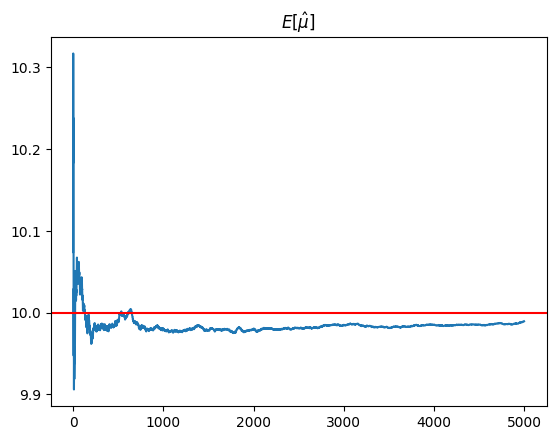

In [6]:
esperanza_medias = []
for i in range(1,len(medias_est)+1):
    esperanza_medias.append(np.mean(medias_est[:i]))
plt.plot(esperanza_medias)
plt.axhline(y=media_real, color='r')
plt.title('$E[\hat{\mu}]$')
plt.show()

In [ ]:
esperanza_var1 = []
esperanza_var2 = []
for i in range(1,len(medias_est)+1):
    esperanza_var1.append(np.mean(vars1_est[:i]))
    esperanza_var2.append(np.mean(vars2_est[:i]))
plt.plot(esperanza_var1)
plt.plot(esperanza_var2)
plt.title('$E[\hat{\sigma}^2]$')
plt.axhline(y=var_real, color='r')
plt.show()

In [ ]:
media_real = 10
var_real = 4
sim = np.random.normal(media_real, np.sqrt(var_real), size=10000)
medias_est = []
vars1_est = []
vars2_est = []

for i in range(1,len(sim)):
    media_est = np.sum(sim[:i])/i
    medias_est.append(media_est)
    if i == 1:
        continue
    var = np.sum((sim[:i] - media_est)**2)
    var1 = var/i
    var2 = var/(i-1)
    vars1_est.append(var1)
    vars2_est.append(var2)

In [ ]:
plt.plot(medias_est)
plt.axhline(y=media_real, color='r')
plt.title('${\mu}$')
plt.show()

In [ ]:
plt.plot(vars1_est)
plt.plot(vars2_est)
plt.axhline(y=var_real, color='r')
plt.title('${\sigma ^2}$')
plt.show()

La media y la desviación estándar son los 2 estadísticos más reportados.
- Usualmente basta con la media y la desviación estándar para describir los datos.
- Nos dan información sobre el intervalo de valores que podremos encontrar.
- Se encuentran en las mismas unidades que los datos.  
- El estimador de la media es el **"Best Linear Unbiased Estimator"** de la media poblacional cuando los datos son iid.
- Si los datos son iid y se distribuyen normalmente

### Ley de los grandes números ###
Sean $ X_1, X_2, ..., X_n $ variables aleatorias i.i.d con un valor esperado finito ($ E[X_i] = \mu < \infty $). Entonces tendremos que para toda $ \epsilon > 0 $.
$$
lim_{n\to\infty} P(|\bar X - \mu|\gt \epsilon) = 0
$$  

### Teorema del límite central ###
Sean $ X_1, X_2, ..., X_n $ variables aleatorias i.i.d con un valor esperado finito ($ E[X_i] = \mu < \infty $) y varianza $ 0 < V[X_i] = \sigma^2 < \infty $. Entonces la variable aleatoria:
$$
Z_n = \frac{\sqrt{n}(\bar X - \mu)}{\sigma}
$$

converge en distribución a una variable aleatoria normal estándar cuando $n$ tiende a infinito, es decir:

$$
lim_{n\to\infty} P(Z_n \lt x) = \Phi (x), \text{para toda } x \epsilon \mathbb{R}
$$  

<>:16: SyntaxWarning: "\m" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\m"? A raw string is also an option.
<>:16: SyntaxWarning: "\m" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\m"? A raw string is also an option.
C:\Users\braya\AppData\Local\Temp\ipykernel_10648\3302892335.py:16: SyntaxWarning: "\m" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\m"? A raw string is also an option.
  ax.set_title('Distribución ${\mu}$')


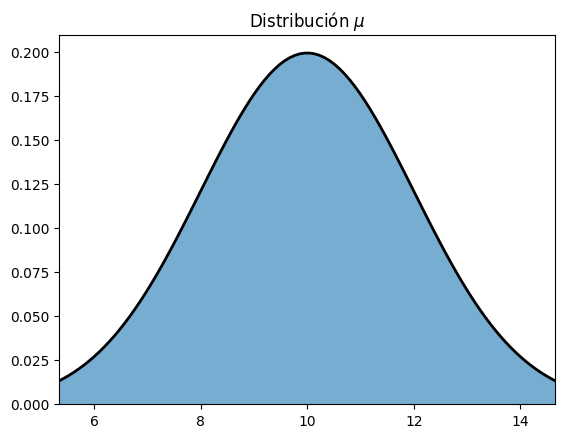

In [4]:
fig, ax = plt.subplots(1, 1)

media_real = 10
var_real = 4
n = 200_000_000

# Numeros aleatorios de una distribucion normal
rv = stats.norm(media_real, np.sqrt(var_real))

x = np.linspace(stats.norm.ppf(0.01, media_real, np.sqrt(var_real)),
                stats.norm.ppf(0.99, media_real, np.sqrt(var_real)), 100)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = stats.norm.rvs(media_real, np.sqrt(var_real), size=n)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.6)
ax.set_title('Distribución ${\mu}$')
ax.set_xlim([x[0], x[-1]])
plt.show()

**Ejercicio**  
Se obtuvieron las siguientes observaciones en un experimento:
![image.png](attachment:image.png)  
Se cree que estas observaciones provienen de una distribución uniforme ~ U(0, b).
- Calcula la media y varianza muestral.
- ¿Cuáles son los estimadores no sesgados de la media y la varianza?
- Calcula el parámetro b de la distribución a partir de tu media muestral.
- Calcula el parámetro b de la distribución a partir de tu varianza muestral.

## Pruebas de hipótesis
El verdadero valor de los parámetros poblacionales es desconocido, ya que rara vez se tiene acceso a toda la población. Sin embargo, los datos muestrales contienen información sobre esos parámetros. Una hipótesis es una afirmación precisa acerca de un parámetro poblacional, y el proceso de evaluar si los datos observados son consistentes con dicha afirmación se llama **prueba de hipótesis.**  
“¿Qué tan probables son los datos observados si la hipótesis es verdadera?”  

Una prueba de hipótesis tiene seis elementos esenciales:

1. **Hipótesis nula (H₀)**: suposición inicial sobre el parámetro poblacional que se considera verdadera durante el test.
$$
H_0:\ \mu_{\text{Fondo}} = \mu_{\text{Benchmark}}
$$  
2. **Hipótesis alternativa (H₁)**: conjunto de valores del parámetro que llevan a rechazar H₀.
$$
H_1:\ \mu_{\text{Fondo}} > \mu_{\text{Benchmark}}
$$
1. **Estadístico de prueba**: valor calculado a partir de la muestra con distribución conocida bajo H₀.
$$
T = \frac{\bar{X} - \mu_0}{\sqrt{\sigma^2 / n}} \sim N(0,1)
$$
1. **Nivel de significancia (α)**: probabilidad de cometer un error al rechazar una H₀ verdadera (error tipo I). Usualmente 5%.

1. **Valor crítico**: punto de corte que define la región de rechazo de H₀.

1. **Regla de decisión**: combinación del estadístico y el valor crítico para decidir si se rechaza o no la hipótesis nula.  
![image.png](attachment:image.png)

**Ejercicio**  
Queremos probar si la media de los retornos en exceso del SP500 son distintos de 0. Utiliza la mayor cantidad de datos disponibles.  
$$
H_0:\ \mu_{\text{SP500}} = 0
$$  
$$
H_1:\ \mu_{\text{SP500}} != 0
$$

### Tipos de errores
![image.png](attachment:image.png)  

### Intervalos de confianza
Un intervalo de confianza es un rango de valores posibles para un parámetro poblacional que complementa la región de rechazo en una prueba de hipótesis.
Por ejemplo, un intervalo de confianza del 95% incluye todos los valores del parámetro para los cuales no se rechaza la hipótesis nula en un test con nivel de significancia del 5%.  
En general, un intervalo de confianza al nivel (1 − α) contiene todos los valores que no serían rechazados con una prueba de tamaño α.  
Cuando se prueba una hipótesis bilateral
$$( H_0: \mu = \mu_0 )$$ frente a $$( H_1: \mu \neq \mu_0 )$$,
el intervalo de confianza al nivel ( 1 -  α) se construye como:

$$
[\bar{x} - C_\alpha \cdot \frac{s}{\sqrt{n}},\ \bar{x} + C_\alpha \cdot \frac{s}{\sqrt{n}}]  
$$  

**Ejercicio**
¿Cuál sería el intervalo de confianza para la prueba que hicimos sobre los retornos en exceso del SP500?

### p-value
El **valor p** es una medida que resume toda la información de una prueba de hipótesis en un solo número.
Representa la **probabilidad de obtener un estadístico de prueba igual o más extremo que el observado**, **si la hipótesis nula fuera cierta**.

* El valor p **siempre está entre 0 y 1**.
* Si el **valor p < α** (nivel de significancia), **se rechaza H₀**.
* Si el **valor p ≥ α**, **no se rechaza H₀**.

También puede interpretarse como el **nivel de significancia más pequeño (α)** para el cual H₀ sería rechazada.
$$
p = 2 \left(1 - CDF(|T|)\right)
$$  
**Ejercicio** ¿Cuál sería el p-value para la prueba que hicimos sobre los retornos en exceso del SP500?

## Regresión Lineal ##

El análisis de regresión es el método más utilizado para medir, modelar y comprobar relaciones entre variables.  

*Ejemplos*: medir la sensibilidad de un portafolio a factores de riesgo, estimar razones de cobertura óptimas, medir rendimientos de fondos de inversión, etc...  

Los modelos de regresión examinan la relación entre una variable dependiente $ Y $ con una o más variables explicativas $ X $.  

**Caso de una sola variable explicativa**  

$ Y = \alpha + \beta X + \epsilon $  
en donde:
- $\beta$: pendiente o coeficiente de regresión
- $\alpha$: intersección, constante
- $\epsilon$: shock, error, perturbación  

$ E[Y]=E[\alpha + \beta X + \epsilon]=\alpha + \beta E[X] $  

**Restricciones**  
- La relación entre $ Y $ y las variables explicativas $ X_1, X_2, ..., X_n $ debe ser lineal en los coeficientes.  
- El error debe ser aditivo.
- Todas las variables explicativas deben ser observables.  

### Ordinary Least Squares (OLS) ###
Supongamos que tenemos $ n $ observaciones de $ Y $ y $ X $:  
$ y_i=\alpha + \beta x_i + \epsilon_i $  

Podemos obtener los estimadores de **OLS** si minizamos la suma de la desviación al cuadrado de los puntos a la línea ajustada.  
$ \hat\alpha,\hat\beta=arg min \sum_{i=1}^{n} (y_i - \alpha - \beta x_i)^2 = RSS $  

Resolviendo esta ecuación obtenemos que:  
$ \hat\alpha = \bar Y - \hat\beta \bar X $  
$ \hat\beta=\Large\frac{\sum_{i=1}^{n}(x_i-\bar X)(y_i-\bar Y)}{\sum_{i=1}^{n}(x_i-\bar X)^2} $

### CAPM ###
El Capital asset pricing model CAPM relaciona el retorno en exceso de un portafolio respecto al retorno en exceso del mercado en general, de tal forma que:  
$ R_p  - R_f = \alpha + \beta(R_{m}-R_{f})+\epsilon_i$  
$ R_p $ es el retorno del portafolio  
$ R_f $ es el retorno libre de riesgo  
$ R_m $ es el retorno del mercado

## Propiedades de los estimadores OLS

El método de **Mínimos Cuadrados Ordinarios (OLS)** requiere una serie de 5 supuestos para que sus estimadores sean válidos, interpretables y posean propiedades estadísticas deseadas.  
  
### Variance de X es mayor que 0
### El error tiene media igual a cero  
También conocido como independencia de la media
$$ E[ε|X] = 0 $$

In [ ]:
n = 100
alpha = 2
beta = 3
X = 5*stats.uniform.rvs(size=n)
eps = stats.norm.rvs(size=n)
Y = alpha + beta*X + eps
plt.scatter(X,Y)
plt.show()

In [ ]:
m1 = sm.OLS(Y, sm.add_constant(X)).fit()
res = m1.resid
r1, p1 = stats.pearsonr(X, res)
plt.scatter(X,res)
plt.show()

In [ ]:
X2 = 5*stats.uniform.rvs(size=n)
eps2 = X2 + np.random.normal(scale=1.0, size=n)
Y2 = alpha + beta*X2 + eps2
plt.scatter(X2,Y2)
plt.show()

In [ ]:
m2 = sm.OLS(Y2, sm.add_constant(X2)).fit()
res2 = m2.resid
plt.scatter(X2,res2)
plt.show()

- Bias de supervivencia
- Variables omitidas
- Bias de atenuación

### Los datos son iid
Asumimos que los pares  (𝑥𝑖,𝑦𝑖)
  son observaciones de una distribución conjunta.

### La varianza del error es constante
- $V[\epsilon_i|X]=\sigma^2<\infty$


In [ ]:
X = 10*stats.uniform.rvs(size=100)
Y = 2 + 3*X + stats.norm.rvs(size=100)
plt.scatter(X,Y)
plt.title('Homocedasticidad')
plt.show()

In [ ]:
m1 = sm.OLS(Y, sm.add_constant(X)).fit()
res = m1.resid
plt.scatter(X,res)
plt.show()

In [ ]:
X = 10*stats.uniform.rvs(size=100)
Y = 2 + 3*X
for i in range(len(Y)):
    Y[i] = Y[i] + stats.norm.rvs(scale=1.5*np.sqrt(X[i]))
plt.scatter(X,Y)
plt.title('Heterocedasticidad')
plt.show()

In [ ]:
m1 = sm.OLS(Y, sm.add_constant(X)).fit()
res = m1.resid
plt.scatter(X,res)
plt.show()

### No hay outliers

In [ ]:
X = 10*stats.uniform.rvs(size=50)
Y = 2 + 3*X + stats.norm.rvs(size=50)

m1 = sm.OLS(Y, sm.add_constant(X)).fit()

x_grid = np.linspace(X.min(), X.max(), 10)
X_new = pd.DataFrame({"const": 1.0, "X": x_grid})  # nombres igualitos a los del ajuste
y_hat = m1.predict(X_new)

# Outlier
X = np.append(X, 9)
Y = np.append(Y, -15)

m2 = sm.OLS(Y, sm.add_constant(X)).fit()

x_grid2 = np.linspace(X.min(), X.max(), 10)
X_new2 = pd.DataFrame({"const": 1.0, "X": x_grid2})  # nombres igualitos a los del ajuste
y_hat2 = m2.predict(X_new2)

plt.scatter(X,Y)
plt.plot(x_grid,y_hat, color='red')
plt.plot(x_grid2,y_hat2, color='orange')
plt.show()

**Ejercicio**  
Realiza regresiones lineales univariadas de los retornos de los siguientes fondos de inversión como variable dependiente:  
- Fidelity Contrafund	FCNTX   
- JPMorgan Small Cap Growth Fund (Clase A)	PGSGX   
- PIMCO Total Return Fund (Inst.)	PTTRX   
- PIMCO High Yield Fund (Inst.)	PHIYX

Contra los siguientes índices:
- VUG (Vanguard Growth ETF)
- VSGAX (Vanguard Small-Cap Growth Index Fund)
- BIV (Vanguard Intermediate-Term Bond Index Fund)
- JNK (SPDR Bloomberg High Yield Bond ETF)  
Reporta los coeficientes encontrados para cada uno de los casos usando 10 años de historia

# Regresión lineal multivariada
La regresión lineal múltiple amplía la regresión simple al incluir más de una variable explicativa.
El modelo general es:

$$
Y_i = \alpha + \beta_1 X_{1i} + \beta_2 X_{2i} + \dots + \beta_k X_{ki} + \varepsilon_i
$$
![image.png](attachment:image.png)
Cada coeficiente mide el efecto marginal de su variable explicativa manteniendo las demás constantes.

**Supuestos**

Al extender el modelo a múltiples variables explicativas, los supuestos de la regresión simple se mantienen con ligeras modificaciones y se añade una nueva condición clave:
- No colinealidad perfecta: Las variables explicativas no deben ser combinaciones lineales exactas.

### Momentos ###  
**Valor esperado**: Promedio ponderado por probabilidad.  
$E[X]=\sum xP(X=x)$  

Las funciones de variables aleatorias también son variables aleatorias.  
$E[f(X)]=\sum f(x)P(X=x)$


### Opciones ###
Son contratos en los que el comprador adquiere el derecho, más no la obligación, de comprar o vender un subyacente a un precio previamente pactado. El vendedor SÍ tiene la obligación de comprarle o venderle el subyacente al comprador de la opción.  

Por tipo de opción:
- Puts: Opción de vender
- Calls: Opción de compra  

Por fecha de ejercicio:
- Americanas: Se puede ejercer la opción en cualquier fecha antes del vencimiento.
- Europeas: Se puede ejercer la opción solo en el vencimiento.
- Mixtas: Durante cierto plazo son europeas y durante otro plazo son americanas.

![image-2.png](attachment:image-2.png)

**Payoff de una opción**  
$ S $: precio subyacente  
$ K $: precio pactado o strike  
Call: $ Payoff = max(0, S-K) $  
Put: $ Payoff = max(0, K-S) $

In [ ]:
K = 100 # strike
S = np.arange(50,150) # precio del subyacente

payoff = S-K
payoff[payoff < 0] = 0
plt.plot(S,payoff)
plt.show()

**Ejemplo**  
Para valuar un call necesitamos el valor esperado de una función del precio.  
Supongamos que el valor de un asset $S$ tomará uno de tres valores $(20, 50, 100)$ dentro de un año con probabilidades de $0.2, 0.5\;y\;0.3$ respectivamente. Si el strike de la opción es $40$. ¿Cuál es el valor esperado del payoff?

**Ejercicio**  
Realiza una regresión lineal multivariada para estimar los precios de un CDS

## Evaluando la regresión lineal
El método de OLS minimiza la suma de los residuos al cuadrado, que se puede dividir en dos componentes:

1. Variación explicada (ESS): la parte que el modelo logra explicar mediante los regresores.
2. Variación no explicada (RSS): la parte atribuida al error del modelo.  

La variación total en la variable dependiente se define como:
$$TSS = \sum_{i=1}^n (Y_i - \bar{Y})^2$$  
$$TSS = ESS + RSS$$  
$R^2$ se define a partir de esta identidad:
$$
R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS}
$$  
Otra forma de definir $R^2$:  
$$ R^2 = Corr(Y, \hat Y )^2 $$  

**Limitaciones de $R^2$**

1. Aumenta siempre al añadir variables
$$ \bar{R}^2 = 1 - \frac{RSS/(n - k - 1)}{TSS/(n - 1)} = 1 - \frac{n - 1}{n - k - 1} \frac{RSS}{TSS} $$
2. No puede compararse entre modelos con diferentes variables dependientes
3. No existe un valor “bueno” universal para $R^2$
  
**Pruebas de hipótesis**  
Cuando se cumplen los supuestos del modelo, los estimadores de los parámetros $\hat{\alpha}$ y $\hat{\beta}_j$ siguen una distribución normal CLT. Por lo que podemos probar una hipótesis nula sobre cada parámetro \beta usando un t-test:
$$t = \dfrac{\hat{\beta}_j - \beta_{j0}}{s.e.(\hat{\beta}_j)}$$
donde en el caso de una variable independiente el error estándar es:  
$$ s.e.(\hat \beta) = \frac{s}{\sigma_x\sqrt{n} }$$  

Debido a que los parámetros estimados pueden estar correlacionados usualmente se utiliza el F-test como alternativa. El estadístico F se calcula como:

$$
F = \frac{(RSS_R - RSS_U)/q}{RSS_U/(n - k_U - 1)}
$$

**$$Y_i = \beta_0 + \beta_1 D_{1i} + \beta_2 D_{2i} + \dots + \beta_{k-1} D_{(k-1)i} + \varepsilon_i$$**